<a href="https://colab.research.google.com/github/greyweb/MIT_DeepLearning_Lab/blob/main/TfMNISTDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MIT Deeplearning Lab-2 Assignment
### MNIST Digit-Classification


MIT Assignment Reference :http://introtodeeplearning.com





Importing Packages



In [34]:
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
assert len(tf.config.list_physical_devices('GPU')) > 0

MNIST Dataset

In [35]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)


Plotting Sample Images from the Datasets

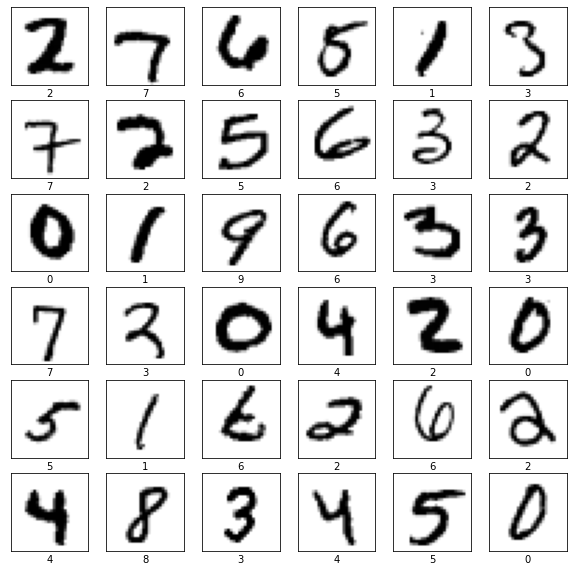

In [6]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

Fully Connected Model -1: 

In [7]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3605 - accuracy: 0.8996
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1928 - accuracy: 0.9451
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1464 - accuracy: 0.9584
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1190 - accuracy: 0.9664
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1005 - accuracy: 0.9711


Testing the Model :

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9701
Test accuracy: 0.9700999855995178


CNN Model:

In [11]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Compile the Model:

In [12]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)


Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1867 - accuracy: 0.9445
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0378 - accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0217 - accuracy: 0.9933


In [14]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0311 - accuracy: 0.9897
Test accuracy: 0.9897000193595886


In [15]:
predictions = cnn_model.predict(test_images)

In [16]:
predictions[0]

array([1.03683685e-11, 6.53126797e-09, 1.54645896e-08, 3.89991271e-07,
       2.63810945e-10, 4.04604995e-11, 7.98328807e-15, 9.99999642e-01,
       2.13127094e-09, 5.72431915e-08], dtype=float32)

In [17]:
predictions[15]

array([3.0998973e-10, 8.2670638e-08, 1.6243726e-09, 2.6768868e-05,
       1.5403309e-11, 9.9997306e-01, 1.2942929e-08, 5.8034266e-09,
       6.9387781e-08, 9.9445874e-09], dtype=float32)

In [18]:
prediction = np.argmax(predictions[0]) 
print(prediction)

7


In [20]:
prediction = np.argmax(predictions[15]) 
print(prediction)

5


Label of this digit is: 7


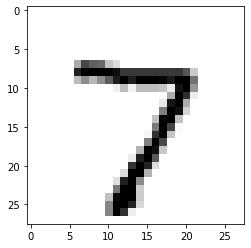

In [21]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

Label of this digit is: 5


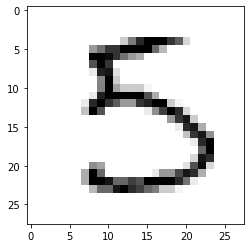

In [22]:
print("Label of this digit is:", test_labels[15])
plt.imshow(test_images[15,:,:,0], cmap=plt.cm.binary)

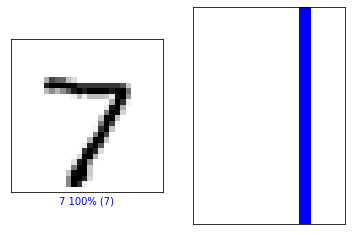

In [33]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 0 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

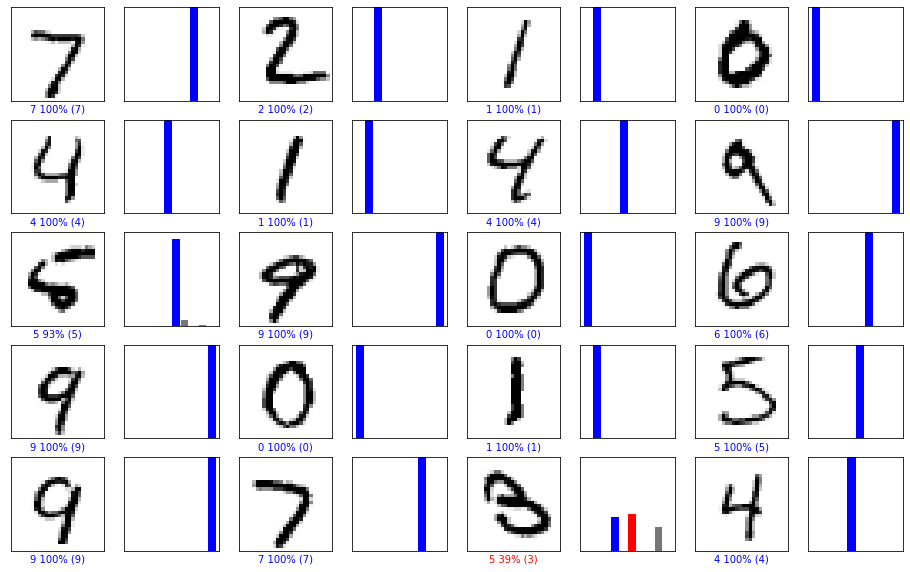

In [26]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

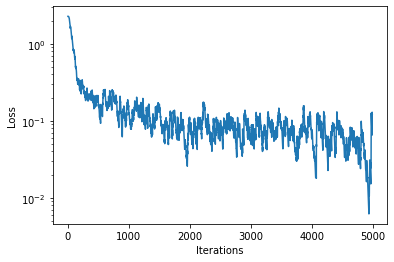

100%|██████████| 5000/5000 [00:35<00:00, 139.21it/s]


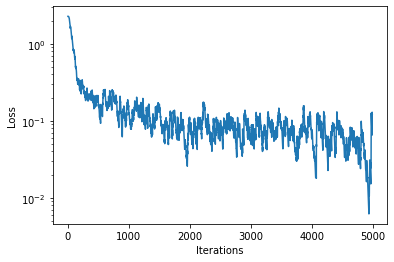

In [27]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))